The purpose of this notebook is to create the outline for a function which processes all of the training data and extracts useful information.


In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
sys.path.insert(1, str(Path().resolve().parent) + r'\Preprocessing')
from chart_functions import chart2tensor, get_configuration
import pickle
import numpy as np

unprocessed_data_path = Path(r'X:\Training Data\Unprocessed')
processed_data_path = Path(r'X:\Training Data\Processed')

Things to measure from the data
- File list
    - Audio files present (distribution of .ogg files)
    - Which track pack the song is from
- Song data
    - Song length (given in milliseconds)
    - Genre
    - Delay
- Note information
    - How many of each type of note there is
- Total size of training data
    - Measured by song file size + chart file size

In [2]:
next(os.walk(unprocessed_data_path))[1]

['Angevil Hero II',
 'Anti Hero',
 'Anti Hero 2',
 'Community Track Pack 6',
 'Digitizer',
 'Facelift Pack 1',
 'Facelift Pack 2',
 'Focal Point',
 'Guitar Hero X',
 'Paradigm']

In [3]:
ogg_list = {}     # How many audio files of type .ogg per folder
mp3_list = {}     # How many audio files of type .mp3 per folder
wav_list = {}     # How many audio files of type .wav per folder
track_pack = {}   # Distribution of songs per track pack
lengths = []      # Song lengths in seconds
sizes = {}         # Size of training data per track pack
genres = {}       # Distribution of song genres
delays = {}       # Distribution of delay

for dirName, subdirList, fileList in os.walk(unprocessed_data_path):  # Walk through training data directory
    if not fileList:  # If file list is empty
        continue
    # Get song data
    try:
        configuration = get_configuration(dirName)
    except:
        print('configuration of {} encoded improperly'.format(dirName))
        continue
    
    # Get track pack
    track_pack_ = str(Path(dirName).parent).split('\\')[3]
    # print('Track Pack: %s' % str(Path(dirName).parent).split('\\')[3])
    if track_pack_ not in track_pack.keys():
        track_pack[track_pack_] = 1
    else:
        track_pack[track_pack_] += 1

    # Get audio file list
    num_ogg_files = 0
    num_mp3_files = 0
    num_wav_files = 0
    mp3 = False         # Boolean to determine if songs are in mp3 format
    wav = False
    for track in fileList:
        if track.endswith('.ogg'):
            num_ogg_files += 1
        if track.endswith('.mp3'):
            num_mp3_files += 1
        if track.endswith('.wav'):
            num_wav_files += 1
    if num_ogg_files > 0:
        if num_ogg_files not in ogg_list.keys():
            ogg_list[num_ogg_files] = 1
        else:
            ogg_list[num_ogg_files] += 1
    if num_mp3_files > 0:
        mp3 = True
        if num_mp3_files not in mp3_list.keys():
            mp3_list[num_mp3_files] = 1
        else:
            mp3_list[num_mp3_files] += 1
    if num_wav_files > 0:
        wav = True
        if num_wav_files not in wav_list.keys():
            wav_list[num_wav_files] = 1
        else:
            wav_list[num_wav_files] += 1
    
    
    # Get lengths
    try:    # Sometimes there's an extra space at the end of the key of configuration
        lengths.append(int(configuration['song_length ']) / 1000)  # ms -> s
    except:
        if 'song_length' in configuration.keys():
            try:
                lengths.append(int(configuration['song_length']) / 1000)  # ms -> s
            except:
                print('song_length for {} unavailable'.format(dirName))
        else:
            print('No song length available for {}'.format(dirName))
    # Get genres
    try:
        if 'genre ' in configuration.keys():
            if configuration['genre '] not in genres.keys():
                genres[configuration['genre ']] = 1
            else:
                genres[configuration['genre ']] += 1
    except:
        if 'genre' in configuration.keys():
            if configuration['genre'] not in genres.keys():
                genres[configuration['genre']] = 1
            else:
                genres[configuration['genre']] += 1
    # Get delays
    try:
        if 'delay ' in configuration.keys():
            if configuration['delay '] not in delays.keys():
                delays[configuration['delay ']] = 1
            else:
                delays[configuration['delay ']] += 1
    except:
        if 'delay' in configuration.keys():
            if configuration['delay'] not in delays.keys():
                delays[configuration['delay']] = 1
            else:
                delays[configuration['delay']] += 1

    # Get size of data
    if num_ogg_files > 1 or num_mp3_files > 1:
        continue # Skip files with separated sources
    if mp3:
        audio_file_name = [i for i in fileList if i.endswith('.mp3')][0]
        audio_file_path = Path(dirName).joinpath(audio_file_name)
        chart_file_path = Path(dirName).joinpath('notes.chart')
        size = (audio_file_path.stat().st_size + chart_file_path.stat().st_size) / 1e9
    elif wav:
        audio_file_name = [i for i in fileList if i.endswith('.wav')][0]
        audio_file_path = Path(dirName).joinpath(audio_file_name)
        chart_file_path = Path(dirName).joinpath('notes.chart')
        size = (audio_file_path.stat().st_size + chart_file_path.stat().st_size) / 1e9
    else:
        audio_file_name = [i for i in fileList if i.endswith('.ogg')][0]
        
    audio_file_path = Path(dirName).joinpath(audio_file_name)
    chart_file_path = Path(dirName).joinpath('notes.chart')
    try:
        size = (audio_file_path.stat().st_size + chart_file_path.stat().st_size) / 1e9
    except:
        print('{} not in .chart format'.format(str(chart_file_path).split('\\')[-3:-1]))

    if track_pack_ not in sizes.keys():
        sizes[track_pack_] = size
    else:
        sizes[track_pack_] += size
    
    length = sum(lengths)
    length_h = length/(60**2)

print('\n\nTrack pack distribution: ', track_pack)
print('.ogg files: ', ogg_list)
print('.mp3 files: ', mp3_list)
print('.wav files: ', wav_list)
print('Delays: ', delays)
print('Sizes: ', sizes)
print('Hours of Music: {}'.format(length_h))


No song length available for X:\Training Data\Unprocessed\Angevil Hero II\5. Exodus - Funeral Hymn
No song length available for X:\Training Data\Unprocessed\Anti Hero\At the Throne of Judgment - Mariner's Cutlass (DeathofTeyolia)
No song length available for X:\Training Data\Unprocessed\Anti Hero\Brand New - Degausser (Chezy)
No song length available for X:\Training Data\Unprocessed\Anti Hero\Job For A Cowboy - The Synthetic Sea (DeathofTeyolia)
No song length available for X:\Training Data\Unprocessed\Anti Hero\Unearth - The Swarm (DeathofTeyolia)
['Anti Hero 2', '50 Cent - Ayo Technology (feat. Justin Timberlake) (Siavash)'] not in .chart format
['Anti Hero 2', 'ABBA - Gimme! Gimme! Gimme! (Raspberriel)'] not in .chart format
['Anti Hero 2', 'Afterglow - Lost One no Goukoku (Neru cover) (Raspberriel)'] not in .chart format
['Anti Hero 2', 'Aquellex - Wanderflux (Raspberriel)'] not in .chart format
['Anti Hero 2', 'Arch Enemy - Vultures (Sygenysis)'] not in .chart format
configuration

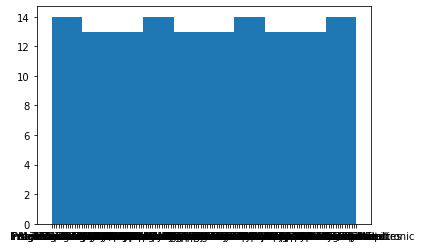

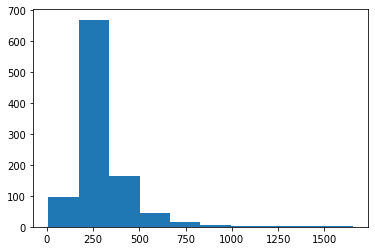

In [4]:
# Plotting
plt.hist(genres);
plt.figure()
plt.hist(lengths);

The following section will analyze the note composition of each song.

- For each song
    - Get the notes
    - Create a folder in "processed" if one doesn't exist already
    - Into that folder, put
        - Dictionary of note distribution
    - Record...
        - Total note distribution per track pack
            - Held
            - Released
            - Notes
            - Modifier

In [5]:
def check_multiple_audio_files(fileList):
    # Get audio file list
    num_files = 0
    multiple_files = False
    mp3 = False         # Boolean to determine if songs are in mp3 format
    wav = False
    for track in fileList:
        if track.endswith('.ogg'):
            num_files += 1
        if track.endswith('.mp3'):
            num_files += 1
        if track.endswith('.wav'):
            num_files += 1
    if num_files > 1:
        multiple_files = True
    return multiple_files

In [6]:
# load dictionaries
dict_path = Path.cwd().parent / 'Resources'

with open(dict_path / 'combo_dict.pkl', 'rb') as handle:
    combo_dict = pickle.load(handle)
with open(dict_path / 'hold_dict.pkl', 'rb') as handle:
    hold_dict = pickle.load(handle)
with open(dict_path / 'modifier_dict.pkl', 'rb') as handle:
    modifier_dict = pickle.load(handle)
with open(dict_path / 'note_dict.pkl', 'rb') as handle:
    note_dict = pickle.load(handle)

In [33]:
num_zero = 0                # To measure sparsity of notes
num_nonzero = 0
wrong_format_charts = []    # Holds paths to charts not in .chart format
multiple_audio_songs = []   # Holds paths to charts with multiple audio files
modifier = []               # Holds tapped vs forced vs regulat
held = []                   # Holds held, released, or neither
dense_notes_agg = []        # Holds all notes that aren't zero
for dirName, subdirList, fileList in os.walk(unprocessed_data_path):  # Walk through training data directory
    if not fileList:  # If file list is empty
        continue
    track_pack_ = str(Path(dirName).parent).split('\\')[3]
    song_ = str(Path(dirName)).split('\\')[4]
    processed_song_path = processed_data_path / track_pack_ / song_
    unprocessed_song_path = unprocessed_data_path / track_pack_ / song_

    print('Processing {}, {}'.format(track_pack_, song_))

    # Skip creating the directory if there is more than one audio file
    if check_multiple_audio_files(fileList):
        multiple_audio_songs.append(unprocessed_song_path)
        continue

    if not processed_song_path.exists():
        os.mkdir(processed_song_path)
    
    # Create note tensor for song
    # print('\nGetting notes for %s' % song_)
    try:
        note_tensor = np.array(chart2tensor(unprocessed_song_path / 'notes.chart', print_release_notes = False)).astype(int)
    except:
        wrong_format_charts.append(unprocessed_song_path)
        continue

    # Analyze for sparsity (number of zeros / total notes)
    num_zero += np.count_nonzero(note_tensor == 0)
    num_nonzero += (len(note_tensor) - np.count_nonzero(note_tensor == 0))

    # dense_notes is the note tensor with all the zeros removed
    dense_notes = note_tensor[note_tensor != 0]

    # Parse through dense_notes, extracting information
    for x in dense_notes:
        ''' Uncomment the next line if memory can handle it '''
        # dense_notes_agg.extend(dense_notes)
        modifier.append(modifier_dict[x])
        held.append(hold_dict[x])

print('\nticks with notes = ', num_nonzero)
print('ticks without notes = ', num_zero)
print('sparsity = %4.5f' % (num_nonzero / (num_nonzero + num_zero)))
print('Charts in bad format: ', len(wrong_format_charts))
print('Songs with multiple audio files: ', len(multiple_audio_songs))



Processing Angevil Hero II, 1. Andy McKee - Ouray
Processing Angevil Hero II, 1. Joe Satriani - The Forgotten (Part One + Part Two)
Processing Angevil Hero II, 1. John 5 - 27 Needles
Processing Angevil Hero II, 1. Lordi - Mr. Killjoy
Processing Angevil Hero II, 1. Megadeth - Kick the Chair
Processing Angevil Hero II, 1. Paul Gilbert - 2 Become 1 (Spice Girls Cover)
Processing Angevil Hero II, 1. Protest the Hero - Limb from Limb (with Intro)
Processing Angevil Hero II, 1. Protest the Hero - Wretch (with Intro)
Processing Angevil Hero II, 1. Scar Symmetry - Dreaming 24_7
Processing Angevil Hero II, 1. Syu - Guitar Demonstration #2
Processing Angevil Hero II, 1. Trivium - To the Rats
Processing Angevil Hero II, 2. Dark Tranquillity - Punish My Heaven
Processing Angevil Hero II, 2. Death - Spirit Crusher
Processing Angevil Hero II, 2. Mastodon - Blood and Thunder
Processing Angevil Hero II, 2. Megadeth - Chosen Ones
Processing Angevil Hero II, 2. Metalium - Free Forever
Processing Angevil

MemoryError: 

### Be careful running this next one, it takes a looong time

In [ ]:
plt.hist(dense_notes, bins = len(np.unique(dense_notes)));
plt.title('Distribution of One Hot Notes')

plt.figure()
plt.hist(modifier)
plt.title('Distribution of \'Tapped\' vs \'Forced\' vs \'Regular\'')

plt.figure()
plt.hist(held)
plt.title('Distribution of \'Held\' vs \'Released\'')